**Uygulama-1: Evrişimli Sinir Ağları ile Nesne Tanıma Uygulaması**

Evrişimli sinir ağları (CNN), özellikle görüntü işleme ve sınıflandırma problemleri için kullanılan bir yapay sinir ağı türüdür. <br>CNN'ler, verilen bir görüntüdeki özellikleri çıkarmak ve nesneleri tanımak için kullanılır. Bu ağlar, özellikle görüntü sınıflandırma, nesne tespiti, yüz tanıma ve araba plakası tanıma gibi alanlarda kullanılmaktadır.

Bu uygulamada Google Colab'da basit bir nesne tanıma uygulaması örneği verilmiştir. Bunun için CIFAR veri seti kullanılmıştır.

CIFAR (Canadian Institute for Advanced Research) veri seti, 10 sınıflı bir nesne sınıflandırma veri setidir. Veri setinde 50.000 adet renkli (32x32 piksel) eğitim görüntüsü ve 10.000 adet test görüntüsü bulunur. Her sınıfın 5.000 eğitim örneği ve 1.000 test örneği vardır.

Sınıflar şunlardır: uçak, otomobil, kuş, kedi, geyik, köpek, kurbağa, at, gemi ve kamyon. Veri seti, daha gerçekçi ve zorlu bir nesne sınıflandırma problemi sunması nedeniyle, makine öğrenimi ve derin öğrenme araştırmaları için popüler bir seçimdir.

**1.Veri toplama ve önişleme:**<br>İlk olarak, Google Colab'da yeni bir defter oluşturulur ve gerekli kütüphaneler (TensorFlow, Keras vb.) içe aktarılır.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

* CIFAR-10 veri kümesindeki 10 sınıfın adlarını içeren listenin oluşturulması



In [2]:
class_names = ['uçak', 'otomobil', 'kuş', 'kedi', 'geyik', 
               'köpek', 'kurbağa', 'at', 'gemi', 'kamyon']

* CIFAR-10 veri kümesinden eğitim verilerinin yüklenmesi ve ön işlenmesi 

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train / 255.0
x_test = x_test / 255.0

# Etiketlerin uygun şekle dönüştürülmesi
y_train = y_train.flatten()
y_test = y_test.flatten()

170498071/170498071 [==============================] - 2s 0us/step


* Rastgele 9 görüntünün seçilmesi ve görselleştirilmesi

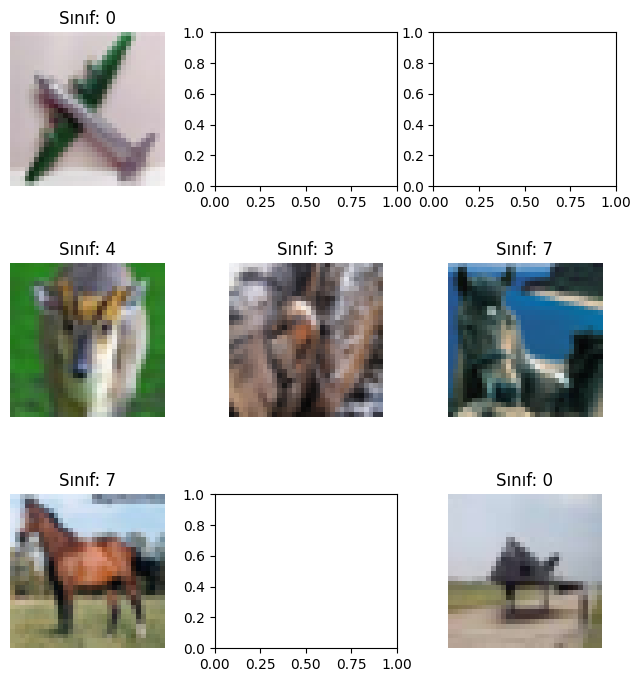

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
axes = axes.ravel()

for i in np.random.randint(0, len(x_train), size=9):
    img = x_train[i]
    axes[i % 9].imshow(img)
    axes[i % 9].axis('off')
    axes[i % 9].set_title('Sınıf: %d' % y_train[i])

plt.subplots_adjust(hspace=0.5)
plt.show()

2. Derin öğrenme modelinin oluşturulması:

* 2.1 CNN modelinin oluşturulması

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

2.2. Modelin Derlenmesi

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

2.3. Modelin eğitilmesi


Epoch 1/10
1250/1250 [==============================] - 74s 58ms/step - loss: 1.5751 - accuracy: 0.4271 - val_loss: 1.3476 - val_accuracy: 0.5243
Epoch 2/10
1250/1250 [==============================] - 72s 58ms/step - loss: 1.2151 - accuracy: 0.5705 - val_loss: 1.1706 - val_accuracy: 0.5847
Epoch 3/10
1250/1250 [==============================] - 74s 59ms/step - loss: 1.0728 - accuracy: 0.6195 - val_loss: 1.0466 - val_accuracy: 0.6371
Epoch 4/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.9828 - accuracy: 0.6534 - val_loss: 0.9832 - val_accuracy: 0.6547
Epoch 5/10
1250/1250 [==============================] - 72s 58ms/step - loss: 0.9071 - accuracy: 0.6838 - val_loss: 0.9671 - val_accuracy: 0.6651
Epoch 6/10
1250/1250 [==============================] - 77s 62ms/step - loss: 0.8462 - accuracy: 0.7031 - val_loss: 0.9114 - val_accuracy: 0.6800
Epoch 7/10
1250/1250 [==============================] - 71s 57ms/step - loss: 0.7914 - accuracy: 0.7214 - val_loss: 0.8757 -

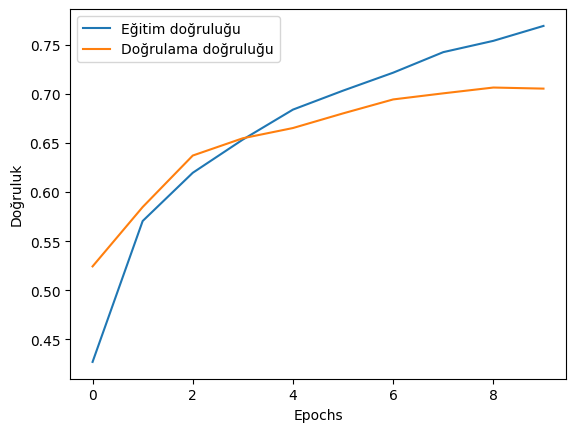

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Eğitim sürecinin görselleştirilmesi
plt.plot(history.history['accuracy'], label='Eğitim doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama doğruluğu')
plt.xlabel('Epochs')
plt.ylabel('Doğruluk')
plt.legend()
plt.show()

Modelin Test Edilmesi ve Değerlendirilmesi
* Test görüntülerinin yüklenmesi ve ön işlenmesi

In [5]:
test_images = []
test_images.append(
    load_img('/content/drive/MyDrive/YSAveDO/data/uygulama1/kamyon.jpg', target_size=(32, 32)))
test_images.append(
    load_img('/content/drive/MyDrive/YSAveDO/data/uygulama1/ucak.jpg', target_size=(32, 32)))
test_images = np.array([img_to_array(img) for img in test_images])
test_images = test_images / 255.0


1/1 [==============================] - 0s 320ms/step
Tahmin edilen sınıf: at
Tahmin edilen sınıf: at


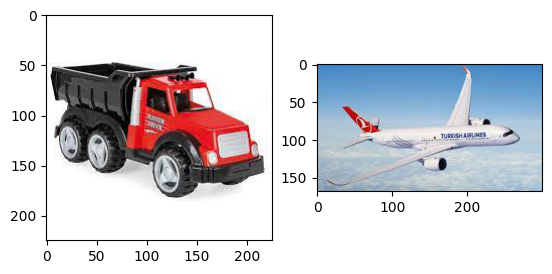

In [6]:
# Tahminlerin yapılması
results = model.predict(test_images)

# Tahmin sonuçlarının yazdırılması
for result in results:
    print('Tahmin edilen sınıf:', class_names[np.argmax(result)])
    
# Görüntülerin gösterilmesi
fig, ax = plt.subplots(1, 2)
ax[0].imshow(load_img('/content/drive/MyDrive/YSAveDO/data/uygulama1/kamyon.jpg'))
ax[1].imshow(load_img('/content/drive/MyDrive/YSAveDO/data/uygulama1/ucak.jpg'))

modelin performansının değerlendirilmesi

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from itertools import product
def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Tahminlerin yapılması

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = y_test.ravel()


313/313 [==============================] - 4s 14ms/step


Hata Matrisi

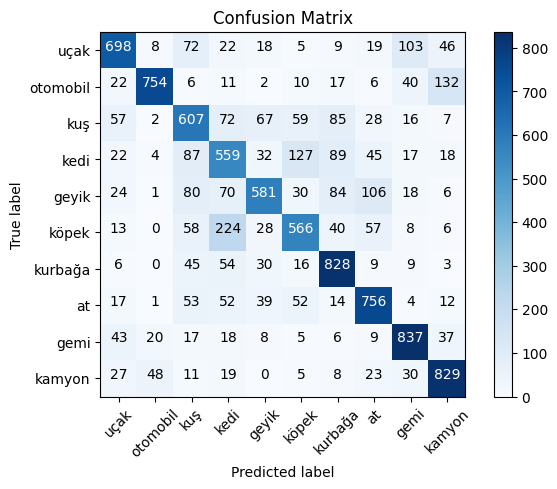

In [ ]:
cm = confusion_matrix(y_true_classes, y_pred_classes)
plot_confusion_matrix(cm, classes=class_names)
plt.show()